In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
missing_val_column = train.isnull().sum()

In [4]:
missing_val_column[missing_val_column>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
housing= pd.concat([train, test], axis=0)

In [6]:
missing_val_column = housing.isnull().sum()
missing_val_column[missing_val_column>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

- ~MSZoning~           4
- LotFrontage      486
- Alley           2721
- ~Utilities~          2
- ~Exterior1st~        1
- ~Exterior2nd~        1
- ~MasVnrType~        24
- MasVnrArea        23
- ~KitchenQual~        1
- ~Functional~         2
- ~FireplaceQu~     1420

### MSZoning

In [7]:
housing.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [8]:
housing['MSZoning']=housing.MSZoning.fillna('RL')

In [9]:
housing.MSZoning.value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [10]:
housing.MSZoning.isnull().sum()

0

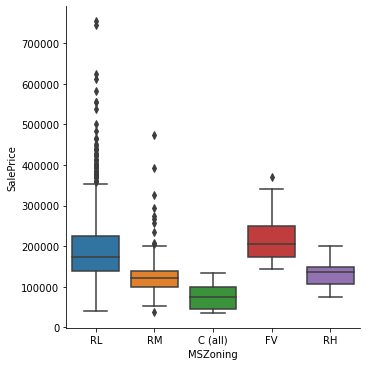

In [11]:
g= sns.catplot(x='MSZoning', y='SalePrice', data=housing, kind='box')

### Utilities

In [12]:
housing.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

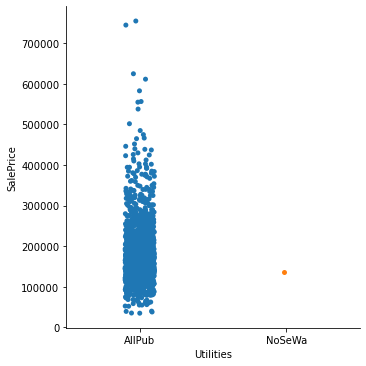

In [13]:
g= sns.catplot(x='Utilities', y='SalePrice', data=housing)

In [14]:
housing=housing.drop('Utilities', axis=1)

Utilities의 경우 하나의 값으로 거의 통일됨 -> col 제거

### Exterior1st

In [15]:
housing.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [16]:
housing.Exterior1st=housing.Exterior1st.fillna('VinylSd')

### Exterior2nd

In [17]:
housing.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [18]:
housing.Exterior2nd= housing.Exterior2nd.fillna('VinylSd')

### MasVnrType

In [19]:
housing.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [20]:
tmp = housing.copy()
tmp.MasVnrType=tmp.MasVnrType.fillna('NaN')

In [21]:
tmp.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

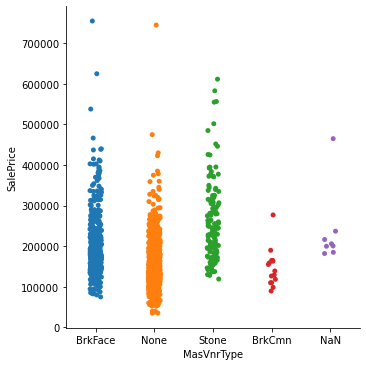

In [22]:
g= sns.catplot(x='MasVnrType', y='SalePrice', data=tmp)

In [23]:
housing.MasVnrType=housing.MasVnrType.fillna('None')

In [24]:
housing.MasVnrType.value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

### MasVnrArea

In [25]:
housing.MasVnrArea.value_counts()

0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64

In [26]:
housing.MasVnrArea.isnull().sum()

23

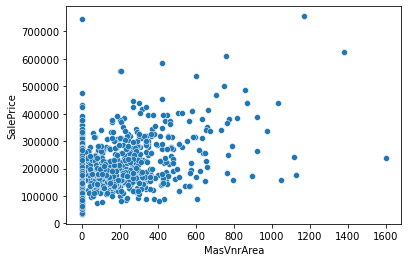

In [27]:
g= sns.scatterplot(x='MasVnrArea', y='SalePrice', data=housing)

In [28]:
housing.MasVnrArea.mean()

102.20131215469613

In [29]:
housing.MasVnrArea=housing.MasVnrArea.fillna(housing.MasVnrArea.mean())

### KitchenQual

In [30]:
housing.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [31]:
housing.KitchenQual=housing.KitchenQual.fillna('TA')

In [32]:
housing.KitchenQual.value_counts()

TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

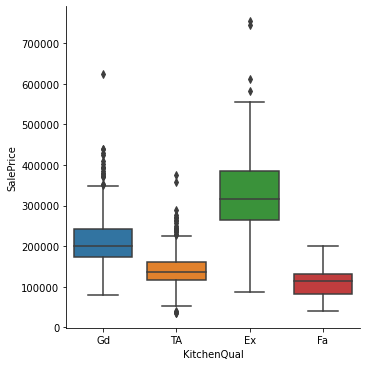

In [33]:
g=sns.catplot(x='KitchenQual', y='SalePrice', data=housing, kind='box')

### Functional

In [34]:
housing.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [35]:
housing.Functional=housing.Functional.fillna('Typ')

In [36]:
housing.Functional.value_counts()

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

### FireplaceQu

In [37]:
housing.FireplaceQu.value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [38]:
tmp=housing.copy()
tmp.FireplaceQu=tmp.FireplaceQu.fillna('NaN')

In [39]:
tmp.FireplaceQu.value_counts()

NaN    1420
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

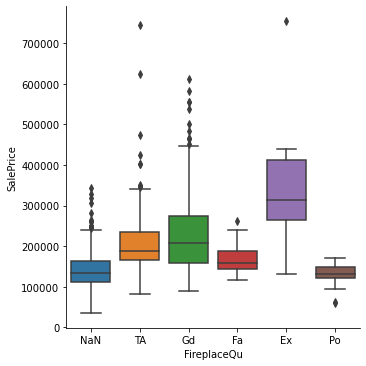

In [40]:
g= sns.catplot(x='FireplaceQu', y='SalePrice', data=tmp, kind='box')

In [41]:
housing.FireplaceQu=housing.FireplaceQu.fillna('NaN')

### Alley

In [42]:
tmp.Alley=tmp.Alley.fillna('NaN')
tmp.Alley.value_counts()

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

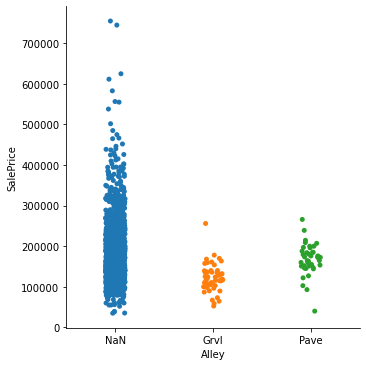

In [43]:
g= sns.catplot(x='Alley', y='SalePrice', data=tmp)

In [103]:
housing.Alley = housing.Alley.fillna('NaN')

In [44]:
missing_val_column = housing.isnull().sum()
missing_val_column[missing_val_column>0]

LotFrontage      486
Alley           2721
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

### LotFrontage

In [45]:
housing.LotFrontage.isnull().sum()

486

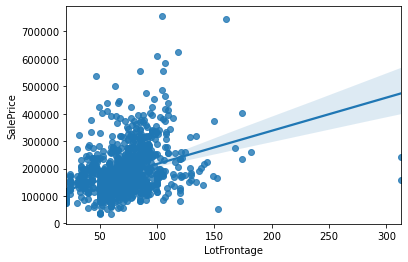

In [46]:
g= sns.regplot(x='LotFrontage', y='SalePrice',data=housing)

In [47]:
housing.LotFrontage=housing.LotFrontage.fillna(housing.LotFrontage.mean())

In [48]:
housing.corr().LotFrontage

Id              -0.025235
MSSubClass      -0.390118
LotFrontage      1.000000
LotArea          0.364382
OverallQual      0.204190
OverallCond     -0.068350
YearBuilt        0.116905
YearRemodAdd     0.085608
MasVnrArea       0.202210
BsmtFinSF1       0.203670
BsmtFinSF2       0.041410
BsmtUnfSF        0.105006
TotalBsmtSF      0.331141
1stFlrSF         0.424147
2ndFlrSF         0.023842
LowQualFinSF     0.004669
GrLivArea        0.349484
BsmtFullBath     0.103086
BsmtHalfBath    -0.023053
FullBath         0.164469
HalfBath         0.035572
BedroomAbvGr     0.212943
KitchenAbvGr     0.004359
TotRmsAbvGrd     0.320863
Fireplaces       0.234612
GarageYrBlt      0.072550
GarageCars       0.292127
GarageArea       0.339026
WoodDeckSF       0.106380
OpenPorchSF      0.152160
EnclosedPorch    0.010541
3SsnPorch        0.025255
ScreenPorch      0.069348
PoolArea         0.160857
MiscVal          0.035762
MoSold           0.010337
YrSold          -0.007265
SalePrice        0.334820
Name: LotFro

## GarageType

In [49]:
housing['GarageType'].isnull().sum()

157

In [50]:
housing['GarageType'] = housing['GarageType'].fillna('No Garage')

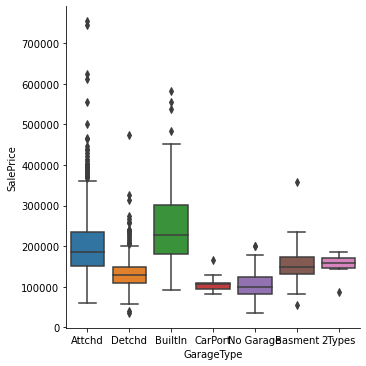

In [51]:
g= sns.catplot(x='GarageType', y='SalePrice', data=housing, kind='box')

## GarageYrBlt

In [52]:
housing['GarageYrBlt'].isnull().sum()

159

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

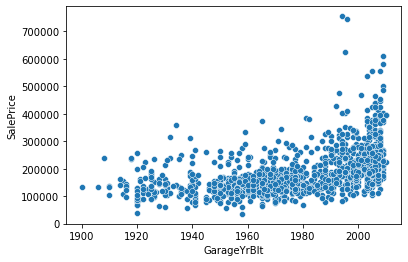

In [53]:
sns.scatterplot(x='GarageYrBlt', y='SalePrice',data=housing)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

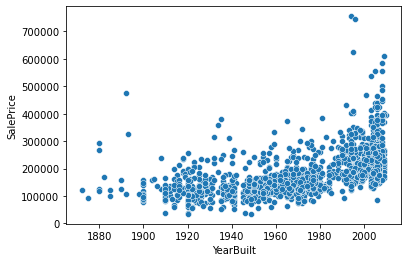

In [54]:
sns.scatterplot(x='YearBuilt', y='SalePrice',data=housing)

In [59]:
tmp = housing.loc[housing.GarageYrBlt.isnull(), 'GarageYrBlt'].index
tmp

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,
            ...
            1402, 1410, 1428, 1431, 1432, 1433, 1449, 1453, 1454, 1457],
           dtype='int64', length=159)

In [68]:
for i in tmp:
    housing.loc[i,'GarageYrBlt']=housing.iloc[i].YearBuilt

In [69]:
housing['GarageYrBlt'].isnull().sum()

0

## GarageFinish

In [70]:
tmp=housing.copy()
tmp.GarageFinish=tmp.GarageFinish.fillna('NaN')

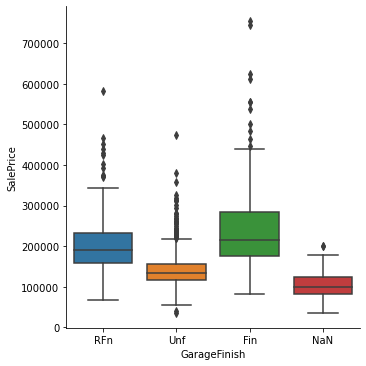

In [71]:
sns.catplot(x='GarageFinish', y='SalePrice',data=tmp, kind='box')

In [72]:
housing.GarageFinish=housing.GarageFinish.fillna('NaN')

In [73]:
housing.groupby('GarageCars').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
GarageCars,,,,,,,,,,,,,,,,,,,,,
0.0,157,157,157,157,157,157,21,157,157,157,...,157,0,27,7,157,157,157,157,157,81
1.0,776,776,776,776,776,776,63,776,776,776,...,776,1,261,39,776,776,776,775,776,369
2.0,1594,1594,1594,1594,1594,1594,105,1594,1594,1594,...,1594,7,261,58,1594,1594,1594,1594,1594,824
3.0,374,374,374,374,374,374,7,374,374,374,...,374,2,17,1,374,374,374,374,374,181
4.0,16,16,16,16,16,16,2,16,16,16,...,16,0,4,0,16,16,16,16,16,5
5.0,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,1,1,1,1,1,0


In [74]:
housing['GarageCars'] = housing['GarageCars'].fillna(0)

In [75]:
housing['GarageCars'].iloc[1116]

2.0

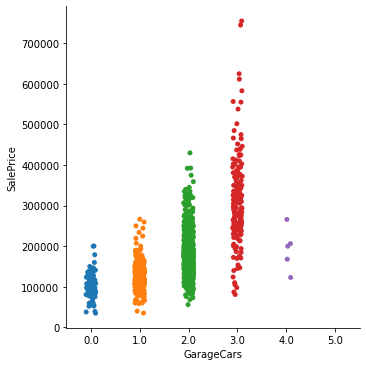

In [76]:
sns.catplot(x='GarageCars', y='SalePrice',data=tmp)

## GarageArea

In [77]:
housing.groupby('GarageType').mean()['GarageArea']['Detchd']

419.49228791773777

In [78]:
housing.groupby('GarageArea').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
GarageArea,,,,,,,,,,,,,,,,,,,,,
0.0,157,157,157,157,157,157,21,157,157,157,...,157,0,27,7,157,157,157,157,157,81
100.0,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,1,1,1,1,1,0
160.0,3,3,3,3,3,3,0,3,3,3,...,3,0,0,0,3,3,3,3,3,2
162.0,2,2,2,2,2,2,1,2,2,2,...,2,0,0,0,2,2,2,2,2,0
164.0,2,2,2,2,2,2,1,2,2,2,...,2,0,0,0,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348.0,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,1,1,1,1,1,0
1356.0,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,1,1,1,1,1,1
1390.0,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,1,1,1,1,1,1


In [79]:
housing[housing['GarageArea'].isna()]['GarageType']

1116    Detchd
Name: GarageType, dtype: object

In [80]:
housing['GarageArea'] = housing['GarageArea'].fillna(housing.groupby('GarageType').mean()['GarageArea']['Detchd'])

In [81]:
housing['GarageArea'][1116]

1116    527.000000
1116    419.492288
Name: GarageArea, dtype: float64

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

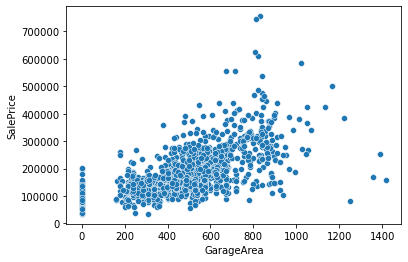

In [82]:
sns.scatterplot(x='GarageArea', y='SalePrice',data=housing)

## GarageQual

In [83]:
housing[housing['GarageQual'].isna()].groupby('GarageType').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
GarageType,,,,,,,,,,,,,,,,,,,,,
Detchd,2,2,2,2,2,2,1,2,2,2,...,2,0,2,1,2,2,2,2,2,0
No Garage,157,157,157,157,157,157,21,157,157,157,...,157,0,27,7,157,157,157,157,157,81


In [105]:
housing.GarageQual=housing.GarageQual.fillna('NaN')

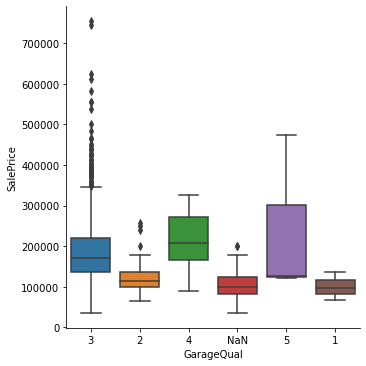

In [106]:
sns.catplot(x='GarageQual', y='SalePrice',data=housing, kind='box')

In [107]:
housing.loc[housing.GarageQual=='Ex', 'GarageQual'] = 5
housing.loc[housing.GarageQual=='Gd', 'GarageQual'] = 4
housing.loc[housing.GarageQual=='TA', 'GarageQual'] = 3
housing.loc[housing.GarageQual=='Fa', 'GarageQual'] = 2
housing.loc[housing.GarageQual=='Po', 'GarageQual'] = 1
housing.loc[housing.GarageQual=='NaN', 'GarageQual'] = 0

In [87]:
housing.GarageQual.value_counts()

3    2604
2     124
4      24
1       5
5       3
Name: GarageQual, dtype: int64

## GarageCond

In [88]:
housing.GarageCond.value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

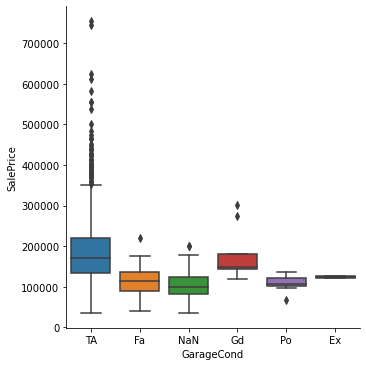

In [108]:
housing.GarageCond=tmp.GarageCond.fillna('housing')
sns.catplot(x='GarageCond', y='SalePrice',data=housing, kind='box')

## PoolQC

In [90]:
housing.groupby('PoolQC').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
PoolQC,,,,,,,,,,,,,,,,,,,,,
Ex,4,4,4,4,4,4,0,4,4,4,...,4,4,2,0,4,4,4,4,4,2
Fa,2,2,2,2,2,2,0,2,2,2,...,2,2,2,1,2,2,2,2,2,2
Gd,4,4,4,4,4,4,0,4,4,4,...,4,4,3,0,4,4,4,4,4,3


In [91]:
housing.loc[housing.PoolQC=='Ex', 'PoolQC'] = 4
housing.loc[housing.PoolQC=='Gd', 'PoolQC'] = 2
housing.loc[housing.PoolQC=='Fa', 'PoolQC'] = 1
housing['PoolQC'] = housing['PoolQC'].fillna(0)

## Fence

In [92]:
housing.groupby('Fence').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Fence,,,,,,,,,,,,,,,,,,,,,
GdPrv,118,118,118,118,118,118,8,118,118,118,...,118,118,118,8,118,118,118,118,118,59
GdWo,112,112,112,112,112,112,5,112,112,112,...,112,112,112,6,112,112,112,112,112,54
MnPrv,329,329,329,329,329,329,21,329,329,329,...,329,329,329,27,329,329,329,329,329,157
MnWw,12,12,12,12,12,12,1,12,12,12,...,12,12,12,1,12,12,12,12,12,11


In [93]:
housing['Fence'] = housing['Fence'].fillna('No Fence')

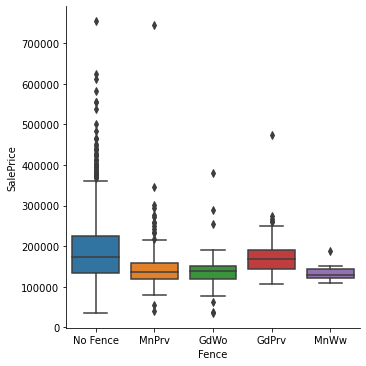

In [95]:
sns.catplot(x='Fence', y='SalePrice',data=housing, kind='box')

## MiscFeature

In [96]:
housing.groupby('MiscFeature').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MiscFeature,,,,,,,,,,,,,,,,,,,,,
Gar2,5,5,5,5,5,5,1,5,5,5,...,5,5,5,5,5,5,5,5,5,2
Othr,4,4,4,4,4,4,0,4,4,4,...,4,4,4,4,4,4,4,4,4,2
Shed,95,95,95,95,95,95,7,95,95,95,...,95,95,95,95,95,95,95,95,95,49
TenC,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [97]:
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')

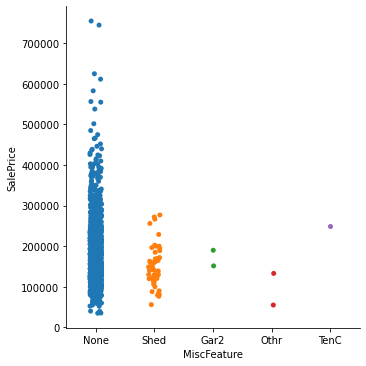

In [99]:
sns.catplot(x='MiscFeature', y='SalePrice',data=housing)

## SaleType

In [100]:
housing.groupby('SaleType').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
SaleType,,,,,,,,,,,,,,,,,,,,,
COD,87,87,87,87,87,87,12,87,87,87,...,87,87,87,87,87,87,87,87,87,43
CWD,12,12,12,12,12,12,1,12,12,12,...,12,12,12,12,12,12,12,12,12,4
Con,5,5,5,5,5,5,1,5,5,5,...,5,5,5,5,5,5,5,5,5,2
ConLD,26,26,26,26,26,26,3,26,26,26,...,26,26,26,26,26,26,26,26,26,9
ConLI,9,9,9,9,9,9,1,9,9,9,...,9,9,9,9,9,9,9,9,9,5
ConLw,8,8,8,8,8,8,0,8,8,8,...,8,8,8,8,8,8,8,8,8,5
New,239,239,239,239,239,239,14,239,239,239,...,239,239,239,239,239,239,239,239,239,122
Oth,7,7,7,7,7,7,0,7,7,7,...,7,7,7,7,7,7,7,7,7,3
WD,2525,2525,2525,2525,2525,2525,166,2525,2525,2525,...,2525,2525,2525,2525,2525,2525,2525,2525,2525,1267


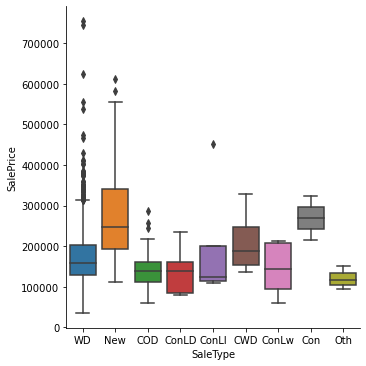

In [101]:
sns.catplot(x='SaleType', y='SalePrice',data=tmp, kind='box')

In [110]:
housing.SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [111]:
housing.SaleType=housing.SaleType.fillna('WD')

In [112]:
missing_val_column = housing.isnull().sum()
missing_val_column[missing_val_column>0]

BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
SalePrice       1459
dtype: int64

In [113]:
mine = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical','BsmtFullBath','BsmtHalfBath']

def object_clear(df, col):
    index_max = df[col].value_counts().idxmax()
    df[col] = df[col].fillna(index_max)

for col in mine :
    if housing[col].dtype == object :
        object_clear(housing,col)
    elif housing[col].dtype == float :
        housing[col] = housing[col].fillna( housing[col].median() )

In [114]:
missing_val_column = housing.isnull().sum()
missing_val_column[missing_val_column>0]

SalePrice    1459
dtype: int64

In [124]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [125]:
housing.to_csv('house.csv', mode='w')

In [126]:
housing_tmp = pd.get_dummies(housing)

In [127]:
housing_tmp.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [129]:
housing_tmp.to_csv('after_one_hot.csv')

In [128]:
housing_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 294 entries, Id to SaleCondition_Partial
dtypes: float64(12), int64(27), uint8(255)
memory usage: 1.7 MB


In [133]:
housing_train=housing_tmp[:len(train)]

In [134]:
housing_test=housing_tmp[len(train):]

In [135]:
housing_test=housing_test.drop('SalePrice', axis=1)

In [137]:
housing_train.to_csv('train_one.csv')
housing_test.to_csv('test_one.csv')

In [138]:
housing_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [139]:
housing_prepared = housing_train.drop('SalePrice',axis=1)
housing_labels = housing_train.SalePrice

In [142]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score # 교차검증

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
# RandomForest 학습
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

# 평가 지표 (RMSE)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse) # 학습데이터에 대한 에러

# Scores
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

11073.553083037055
Scores: [25359.79585069 26279.04313346 22849.74637492 39690.88580084
 33435.47683924 25456.42166421 24346.32033336 24709.88780102
 43607.15084754 27545.46278809]
Mean: 29328.019143337246
Standard deviation: 6778.466784680083


In [143]:
test_predictions = forest_reg.predict(housing_test)

In [145]:
test_predictions.shape

(1459,)

In [146]:
sub=pd.DataFrame()
sub['Id']=housing_test.Id
sub['SalePrice']=test_predictions
sub.to_csv('submission.csv', index=False)

In [150]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [151]:
kfold = StratifiedKFold(n_splits=10)
random_state=77
classifiers=[]
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [ ]:
cv_results = []
for classifier in classifiers :
  cv_results.append(cross_val_score(classifier, housing_prepared, y=housing_labels, scoring = 'accuracy', cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
  cv_means.append(cv_result.mean())
  cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

C:\Users\taehyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\taehyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\taehyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\taehyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\taehyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarn